In [51]:
import numpy as np
from tqdm import tqdm
from scipy.stats import norm
from typing import *
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson

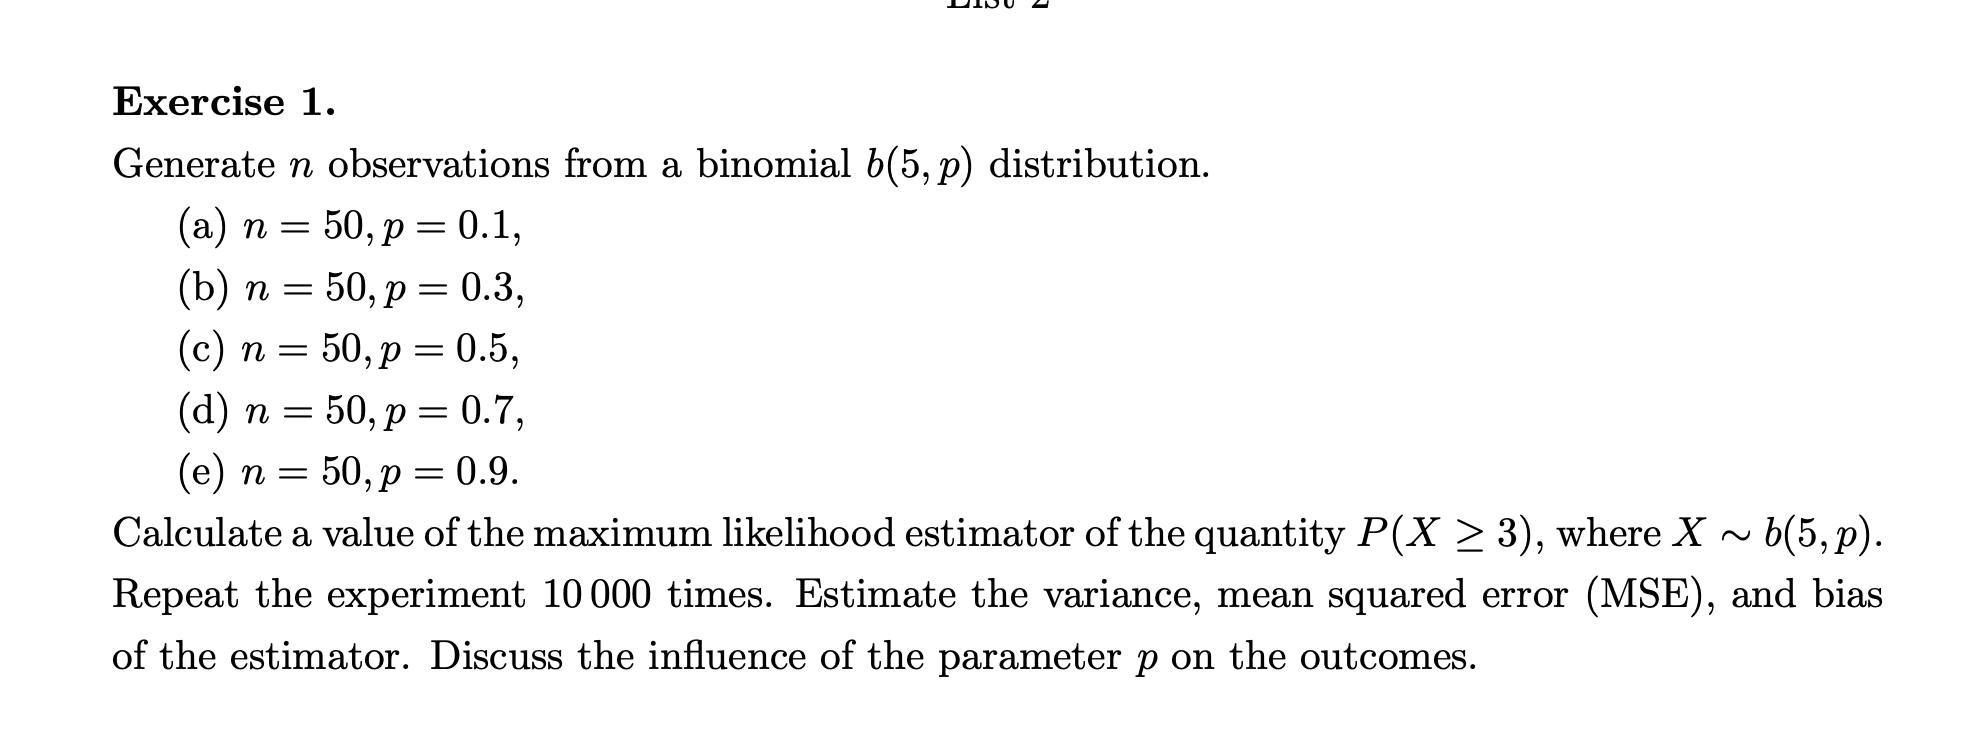

In [14]:
ps = [0.1, 0.3, 0.5, 0.7, 0.9]

p_hats_means = []
Ps_means = []
variance_means = []
mse_means = []
bias_means = []

for p in ps:
    p_hats = []
    Ps = []
    for _ in range(10000):
        X = np.random.binomial(n=5, p=p, size=50)

        # Calculate MLE p_hat
        p_hat = X.mean() / 5
        
        # Calculate P(x >= 3)
        P = 1 - binom.cdf(k=2, n=5, p=p_hat)  
        
        Ps.append(P)
        p_hats.append(p_hat)
    
    p_hats = np.array(p_hats)
    print(
        f'True p = {p}, '
        f'mean p_hat = {np.mean(p_hats):3f}, '
        f'var p_hat = {np.var(p_hats):.3f}, '
        f'MSE p_hat = {np.mean((p_hats - p) ** 2):.3f}, '
        f'bias p_hat = {np.mean(p_hats - p):.3f}, '
        f'mean P = {np.mean(Ps):.3f}'
    )
    true_P = 1 - binom.cdf(k=2, n=5, p=p)
    
    Ps = np.array(Ps)
    p_hats_means.append(np.mean(p_hats))
    Ps_means.append(np.mean(Ps))
    variance_means.append(np.var(Ps))
    mse_means.append(np.mean((Ps - true_P) ** 2))
    bias_means.append(np.mean(Ps - true_P))
    
pd.DataFrame({
    "p": ps,
    "p_hat": p_hats_means,
    "P(X >= 3)": Ps_means,
    "variance_means": variance_means,
    "mse_means": mse_means,
    "bias_means": bias_means
})

True p = 0.1, mean p_hat = 0.099915, var p_hat = 0.000, MSE p_hat = 0.000, bias p_hat = -0.000, mean P = 0.009
True p = 0.3, mean p_hat = 0.299927, var p_hat = 0.001, MSE p_hat = 0.001, bias p_hat = -0.000, mean P = 0.165
True p = 0.5, mean p_hat = 0.500027, var p_hat = 0.001, MSE p_hat = 0.001, bias p_hat = 0.000, mean P = 0.500
True p = 0.7, mean p_hat = 0.700181, var p_hat = 0.001, MSE p_hat = 0.001, bias p_hat = 0.000, mean P = 0.835
True p = 0.9, mean p_hat = 0.900129, var p_hat = 0.000, MSE p_hat = 0.000, bias p_hat = 0.000, mean P = 0.991


,p,p_hat,P(X >= 3),variance_means,mse_means,bias_means
0,0.1,0.099915,0.009319,0.000024,0.000025,0.000759
1,0.3,0.299927,0.165010,0.001420,0.001424,0.001930
2,0.5,0.500027,0.500050,0.003437,0.003437,0.000050
3,0.7,0.700181,0.835011,0.001505,0.001509,-0.001909
4,0.9,0.900129,0.990712,0.000024,0.000024,-0.000728


# TODO
Table should be for P(x >= 3) not p_hat

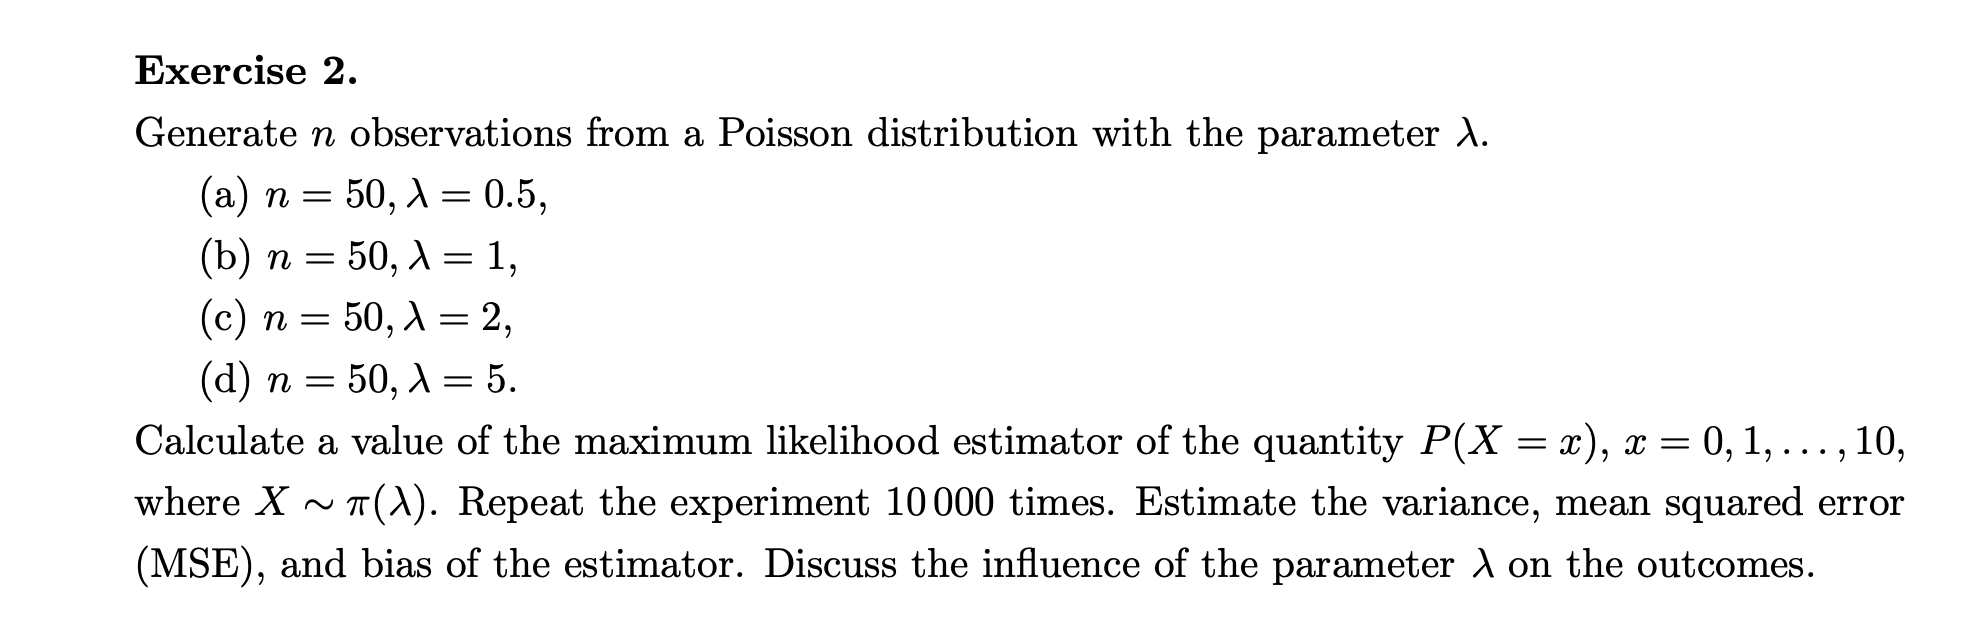

In [30]:
lams = (0.5, 1, 2, 5)
lams = (5, )
xes = np.arange(11)

lam_hats_means = []
Ps_means = []
variance_means = []
mse_means = []
bias_means = []


for x in xes:
    lam_hats = []
    Ps = []
    lam = 0.5
    for _ in range(10000):
        X = np.random.poisson(lam=lam, size=50)

        # Calculate MLE p_hat
        lam_hat = X.mean()
        
        # Calculate P(x >= 3)
        P = poisson.pmf(k=x, mu=lam_hat)  
        
        Ps.append(P)
        lam_hats.append(lam_hat)
    
    lam_hats = np.array(lam_hats)
    print(
        f'True lambda = {lam}, '
        f'mean lam_hat = {np.mean(lam_hats):3f}, '
        f'var lam_hat = {np.var(lam_hats):.3f}, '
        f'MSE lam_hat = {np.square(np.mean((lam_hats - lam) ** 2)):.3f}, '
        f'bias lam_hat = {np.mean(lam_hats - lam):.3f}, '
        f'mean P = {np.mean(Ps):.3f}'
    )
    
    true_P = poisson.pmf(k=x, mu=lam_hat)  
    
    Ps = np.array(Ps)
    lam_hats_means.append(np.mean(lam_hats))
    Ps_means.append(np.mean(Ps))
    variance_means.append(np.var(Ps))
    mse_means.append(np.mean((Ps - true_P) ** 2))
    bias_means.append(np.mean(Ps - true_P))
    
    
pd.DataFrame({
    "X": xes,
    "lam_hat": lam_hats_means,
    "P(X = x)": Ps_means,
    "variance_means": variance_means,
    "mse_means": mse_means,
    "bias_means": bias_means
})

True lambda = 0.5, mean lam_hat = 0.499424, var lam_hat = 0.010, MSE lam_hat = 0.000, bias lam_hat = -0.001, mean P = 0.610
True lambda = 0.5, mean lam_hat = 0.500272, var lam_hat = 0.010, MSE lam_hat = 0.000, bias lam_hat = 0.000, mean P = 0.299
True lambda = 0.5, mean lam_hat = 0.499384, var lam_hat = 0.010, MSE lam_hat = 0.000, bias lam_hat = -0.001, mean P = 0.076
True lambda = 0.5, mean lam_hat = 0.499014, var lam_hat = 0.010, MSE lam_hat = 0.000, bias lam_hat = -0.001, mean P = 0.013
True lambda = 0.5, mean lam_hat = 0.500320, var lam_hat = 0.010, MSE lam_hat = 0.000, bias lam_hat = 0.000, mean P = 0.002
True lambda = 0.5, mean lam_hat = 0.500940, var lam_hat = 0.010, MSE lam_hat = 0.000, bias lam_hat = 0.001, mean P = 0.000
True lambda = 0.5, mean lam_hat = 0.497566, var lam_hat = 0.010, MSE lam_hat = 0.000, bias lam_hat = -0.002, mean P = 0.000
True lambda = 0.5, mean lam_hat = 0.500704, var lam_hat = 0.010, MSE lam_hat = 0.000, bias lam_hat = 0.001, mean P = 0.000
True lambda 

,X,lam_hat,P(X = x),variance_means,mse_means,bias_means
0,0,0.499424,6.099114e-01,3.672619e-03,2.495136e-02,-1.458724e-01
1,1,0.500272,2.988127e-01,9.537564e-04,1.476018e-03,2.285303e-02
2,2,0.499384,7.606436e-02,5.082413e-04,1.727929e-03,3.492403e-02
3,3,0.499014,1.338108e-02,4.262896e-05,5.377009e-05,-3.337833e-03
4,4,0.500320,1.847347e-03,1.637453e-06,1.856170e-05,-4.113909e-03
5,5,0.500940,2.095089e-04,3.560707e-08,4.496480e-08,-9.673535e-05
6,6,0.497566,1.994026e-05,5.635963e-10,2.115389e-09,-3.939281e-05
7,7,0.500704,1.750528e-06,6.868717e-12,8.552818e-12,-1.297729e-06
8,8,0.500682,1.310922e-07,4.862989e-14,6.455903e-14,1.262107e-07
9,9,0.501010,9.490283e-09,4.147248e-16,4.958336e-16,9.006044e-09


# TODO

One table 3 x 11 for one selected lambda and discuss for other lambdas

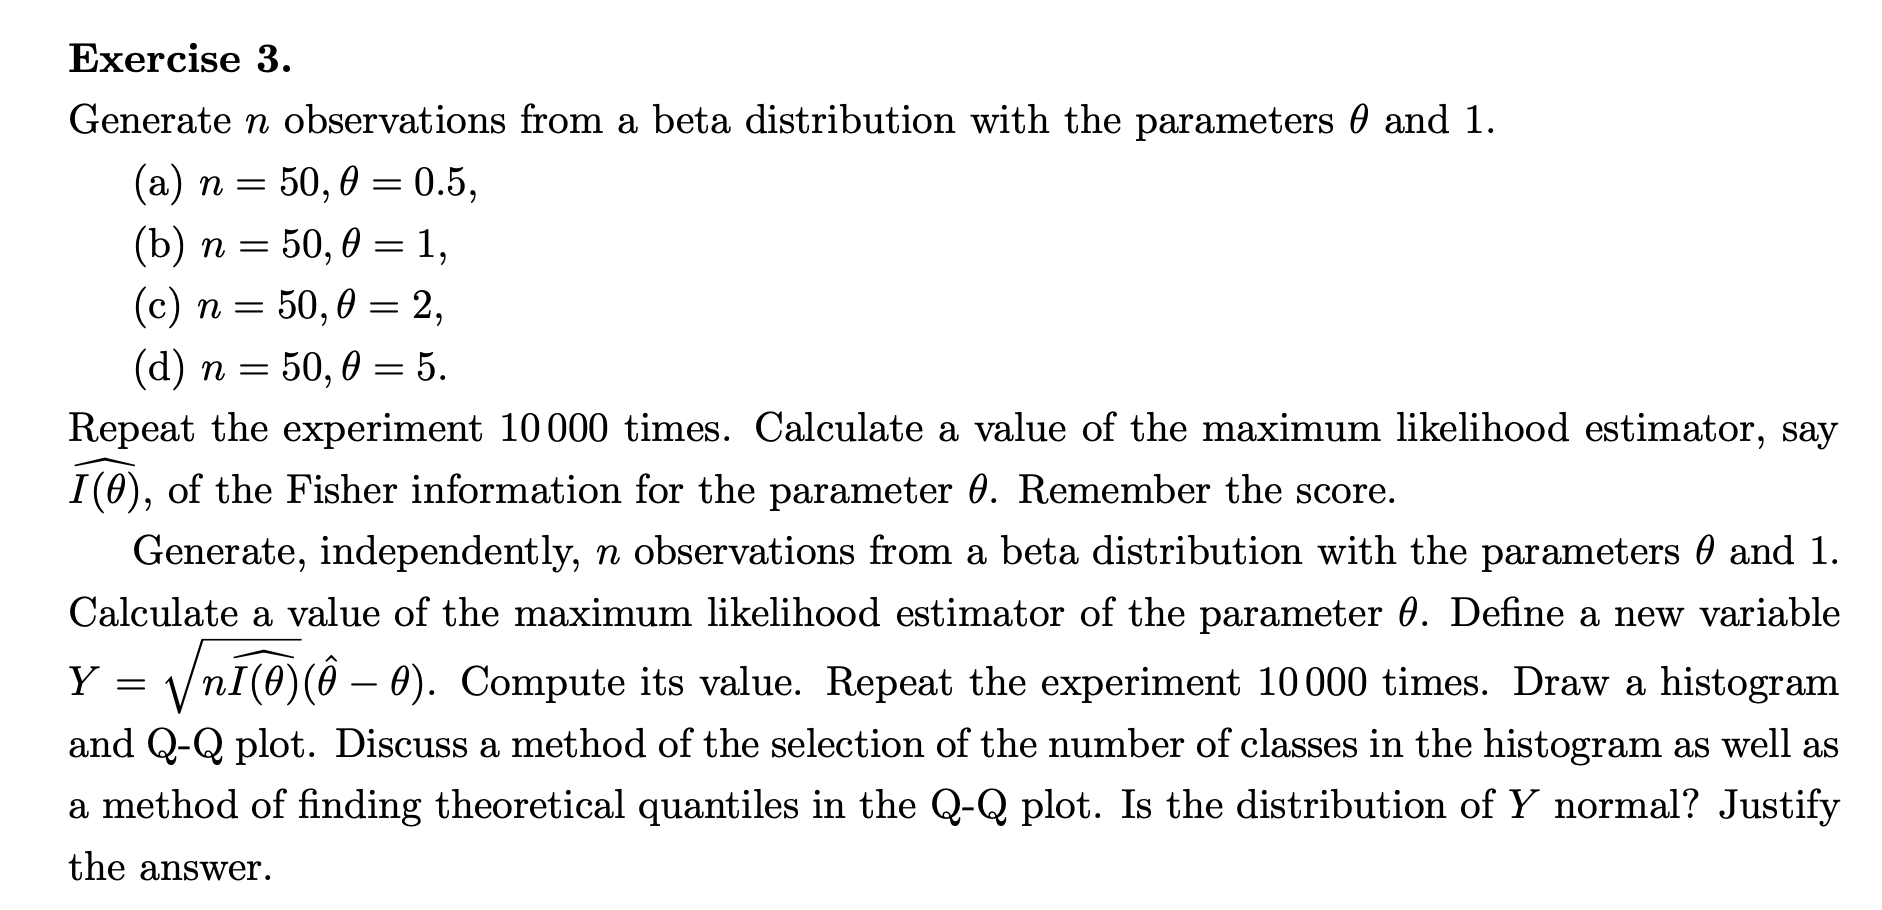

In [23]:
import statsmodels.api as sm
from scipy.stats import shapiro

True alpha = 0.5, mean alpha_hat = 0.510339, mean P = 4.075, mean Y = 0.147


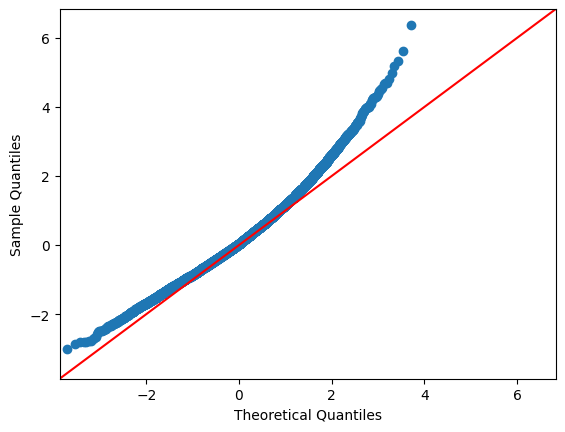

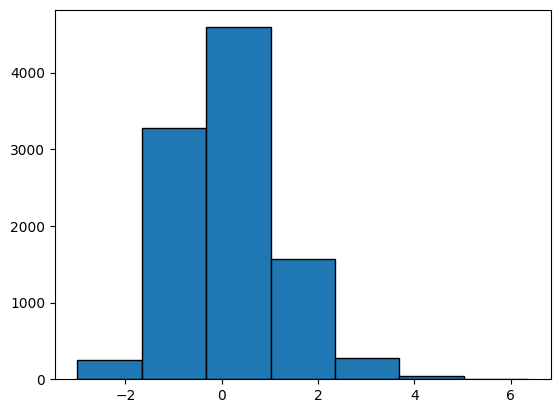

Test shapiro: ShapiroResult(statistic=0.9779801368713379, pvalue=3.7502120026116355e-27)
True alpha = 1, mean alpha_hat = 1.019947, mean P = 1.016, mean Y = 0.139


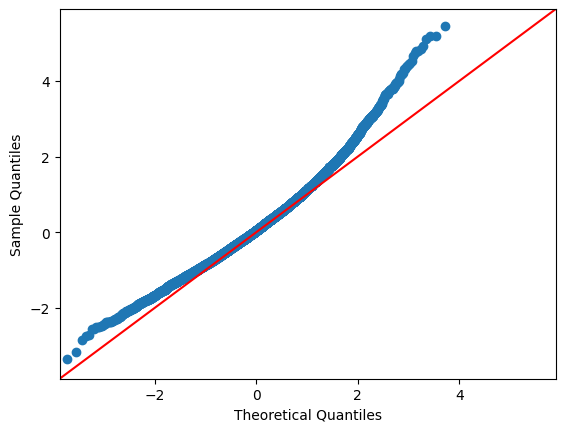

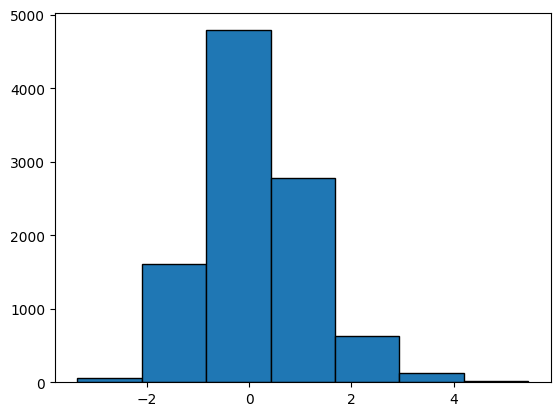

Test shapiro: ShapiroResult(statistic=0.9772161841392517, pvalue=1.4184844781926287e-27)
True alpha = 2, mean alpha_hat = 2.042024, mean P = 0.256, mean Y = 0.150


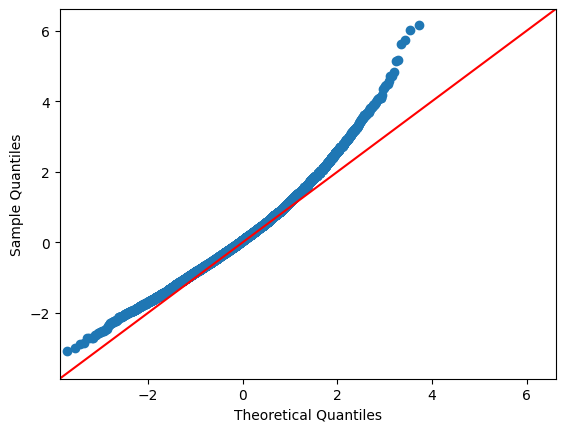

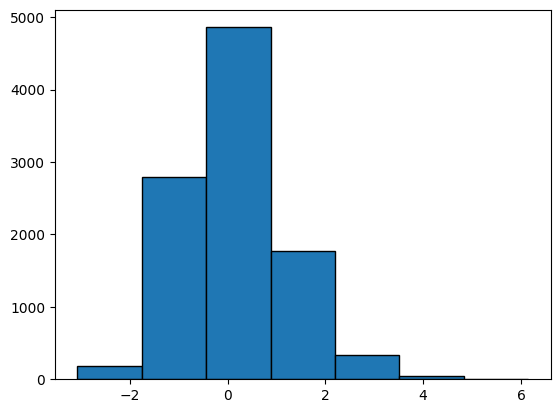

Test shapiro: ShapiroResult(statistic=0.984435498714447, pvalue=4.714819051025527e-23)
True alpha = 5, mean alpha_hat = 5.100361, mean P = 0.041, mean Y = 0.141


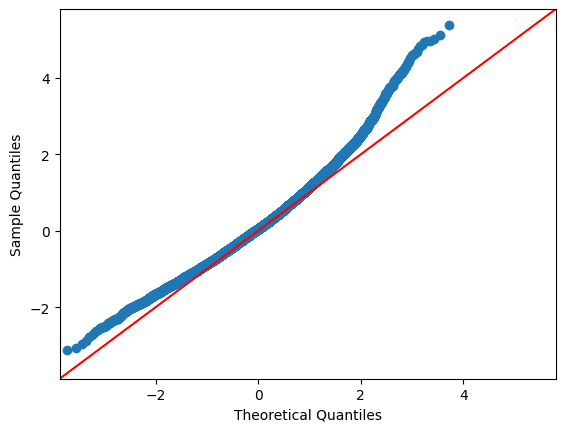

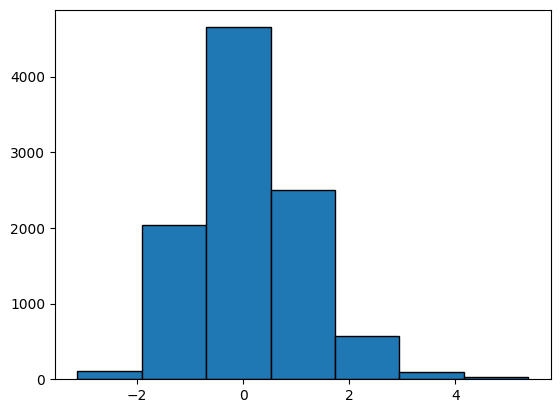

Test shapiro: ShapiroResult(statistic=0.9776857495307922, pvalue=2.57066869704489e-27)


In [36]:
for alpha in (0.5, 1, 2, 5):
    alpha_hats = []
    fisher_information = []
    Ys = []
    N = 50
    for _ in range(10000):
        X = np.random.beta(a=alpha, b=1, size=N)

        # Calculate MLE p_hat
        alpha_hat = -N / np.sum(np.log(X)) 
        
        fisher = 1 / (alpha_hat ** 2)
        
        X = np.random.beta(a=alpha, b=1, size=N)
        alpha_hat = -N / np.sum(np.log(X)) 
        
        Y = np.sqrt(N * fisher) * (alpha_hat - alpha)
        Ys.append(Y)

        fisher_information.append(fisher)
        alpha_hats.append(alpha_hat)
    
    alpha_hats = np.array(alpha_hats)
    print(
        f'True alpha = {alpha}, '
        f'mean alpha_hat = {np.mean(alpha_hats):3f}, '
        f'mean P = {np.mean(fisher_information):.3f}, '
        f'mean Y = {np.mean(Ys):.3f}'
    )
    plot = sm.qqplot(np.array(Ys), line='45')
    plt.show()
    plt.hist(Ys, bins=int(np.sqrt(N)), edgecolor='black')
    plt.show()
    print(f"Test shapiro: {shapiro(Ys[:5000])}")

In [45]:
results = []
NS = [50, 500, 1000, 5000, 10000]
for N in NS:    
    for alpha in (5, ):
        alpha_hats = []
        fisher_information = []
        Ys = []
        for _ in range(10000):
            X = np.random.beta(a=alpha, b=1, size=N)

            # Calculate MLE p_hat
            alpha_hat = -N / np.sum(np.log(X)) 
            
            fisher = 1 / (alpha_hat ** 2)
            
            X = np.random.beta(a=alpha, b=1, size=N)
            alpha_hat = -N / np.sum(np.log(X)) 
            
            Y = np.sqrt(N * fisher) * (alpha_hat - alpha)
            Ys.append(Y)

            fisher_information.append(fisher)
            alpha_hats.append(alpha_hat)
        
        alpha_hats = np.array(alpha_hats)
        shap = shapiro(Ys[:5000])
        print(f"Test shapiro: {shap}")
        results.append(shap.pvalue)

Test shapiro: ShapiroResult(statistic=0.9754086136817932, pvalue=1.5636030587609638e-28)
Test shapiro: ShapiroResult(statistic=0.9978849291801453, pvalue=2.314782932444359e-06)
Test shapiro: ShapiroResult(statistic=0.9979448318481445, pvalue=3.310271949885646e-06)
Test shapiro: ShapiroResult(statistic=0.9995442628860474, pvalue=0.29000017046928406)
Test shapiro: ShapiroResult(statistic=0.9993804097175598, pvalue=0.08700287342071533)


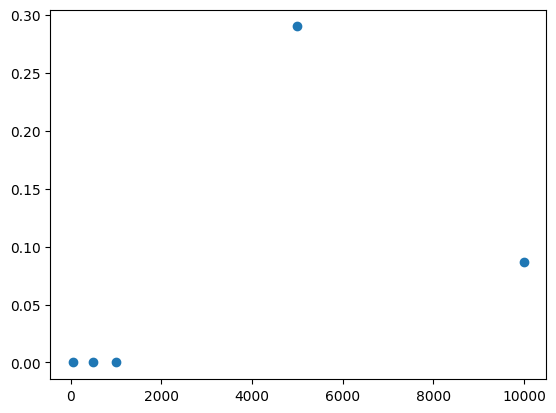

In [46]:
plt.scatter(NS, results)

## TODO

Do a shapino test for normality of Y

With more samples the p-value should go higher, therefore the sample becomes normal.

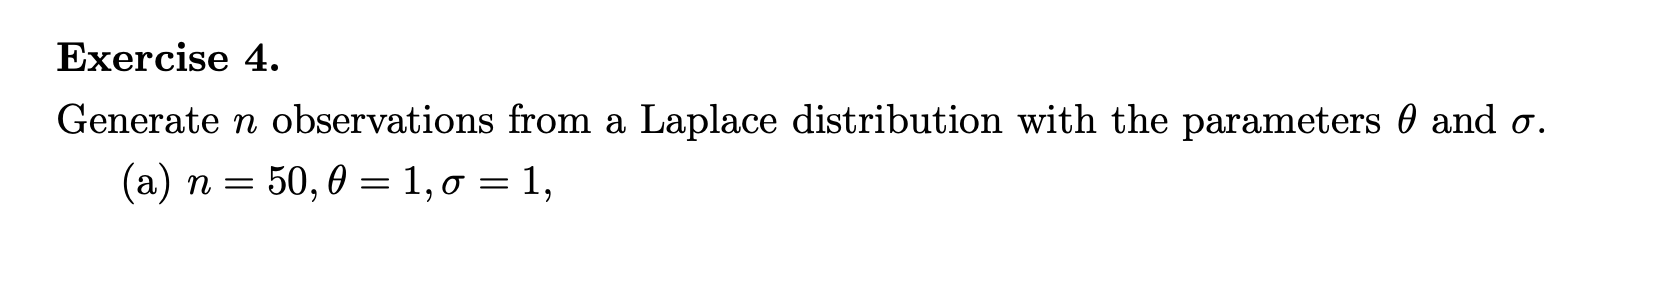
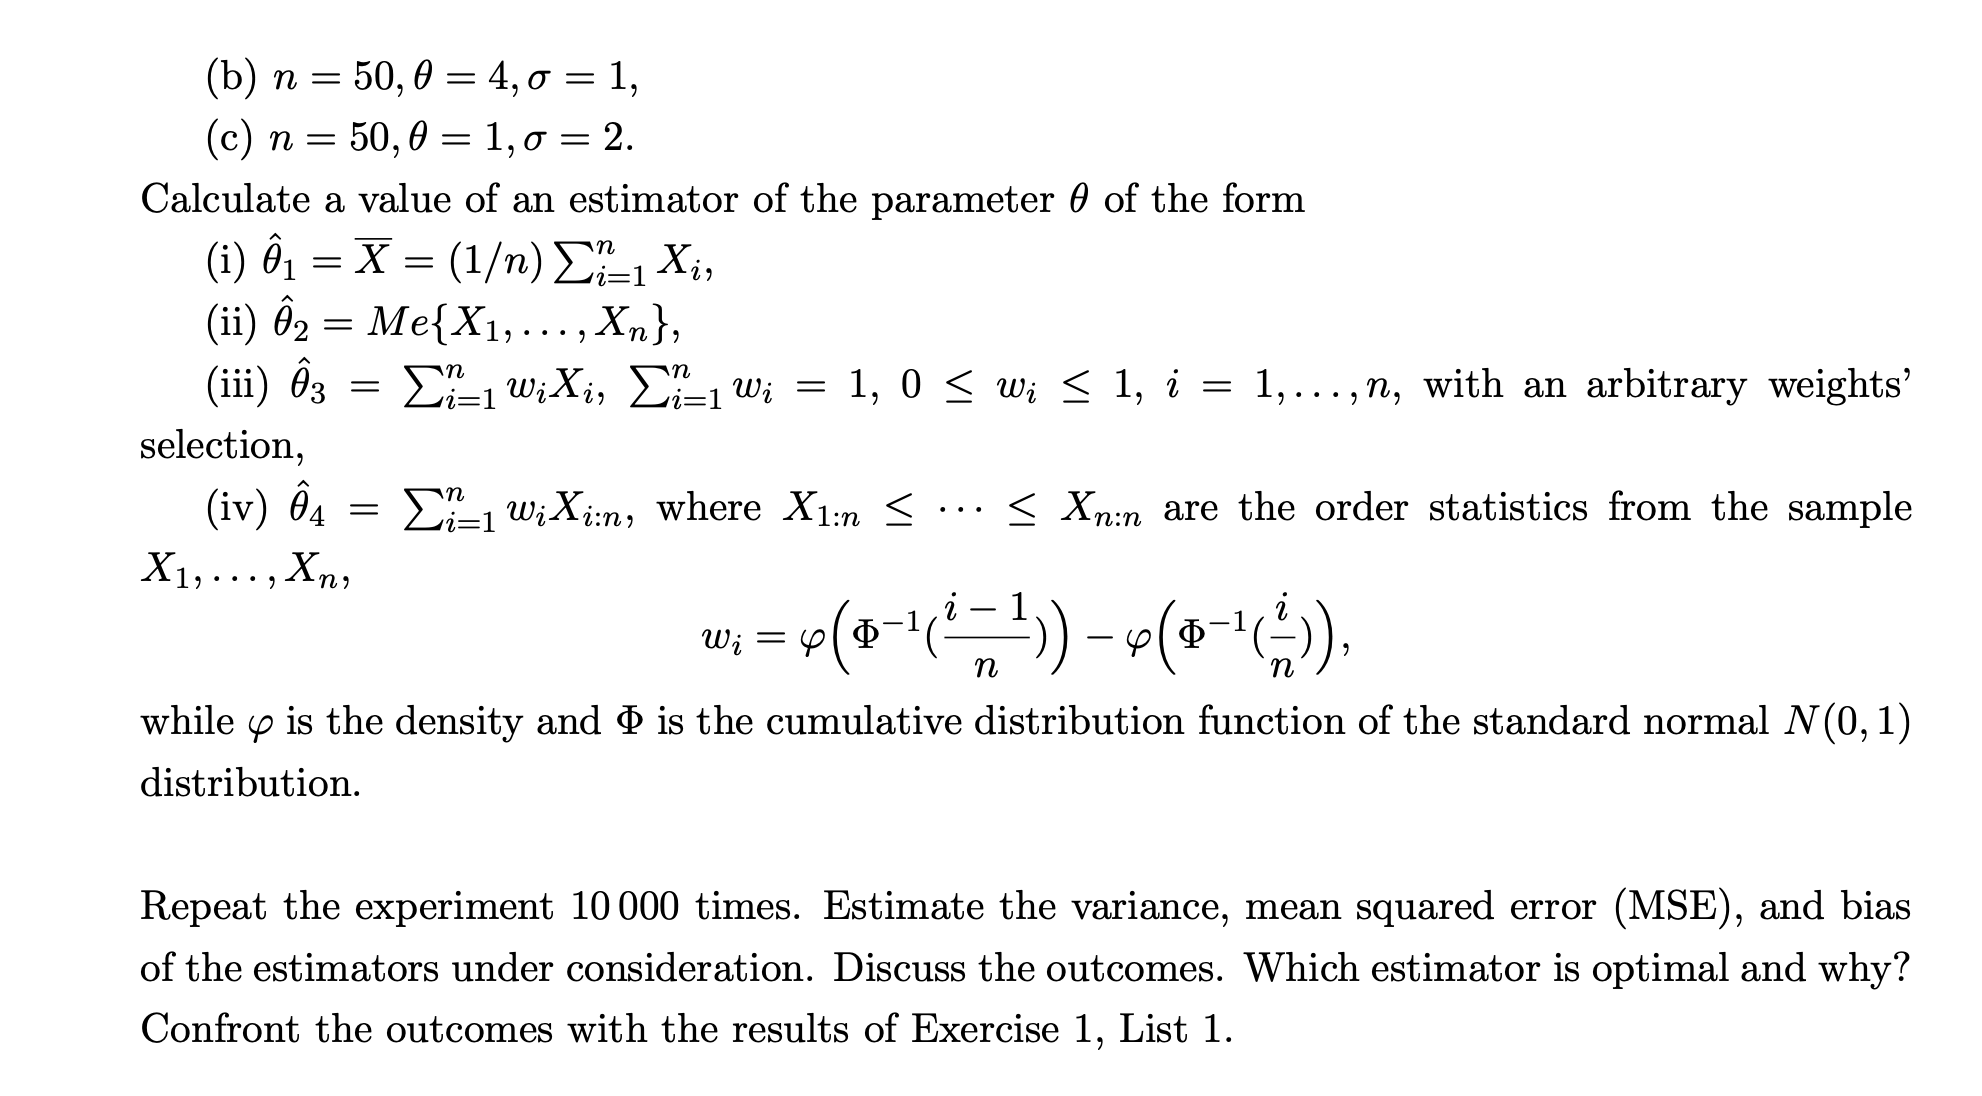

In [52]:
Thetas = [1, 4, 1]
Sigmas = [1, 1, 2]
W = np.random.uniform(0, 1, size=50)
W /= sum(W)

W2 = np.array([
    norm.pdf(norm.ppf((i - 1) / 50)) - norm.pdf(norm.ppf(i / 50)) 
    for i in range(1, 51)
])


for theta, sigma in zip(Thetas, Sigmas):
    theta_hats_1 = []
    theta_hats_2 = []
    theta_hats_3 = []
    theta_hats_4 = []
    for _ in range(10000):
        X = np.array(sorted(np.random.laplace(loc=theta, scale=sigma, size=50)))

        # (i)
        theta_hat_1 = X.mean()
        theta_hats_1.append(theta_hat_1)
        
        # (ii)
        theta_hat_2 = np.median(X)
        theta_hats_2.append(theta_hat_2)
        
        # (iii)
        theta_hat_3 = np.sum(X * W)
        theta_hats_3.append(theta_hat_3)
        
        # (iv)
        theta_hat_4 = np.sum(X * W2)
        theta_hats_4.append(theta_hat_4)
        
    
    print(
        f'True theta = {theta}, '
        f'True sigma = {sigma}, \n'
        f'mean theta_hats_1 = {np.mean(theta_hats_1):3f}, '
        f'mean theta_hats_2 = {np.mean(theta_hats_2):3f}, '
        f'mean theta_hats_3 = {np.mean(theta_hats_3):3f}, '
        f'mean theta_hats_4 = {np.mean(theta_hats_4):3f}, '
        # f'var theta_hats_1 = {np.var(theta_hats_1):3f}, '
        # f'var theta_hats_2 = {np.var(theta_hats_2):3f}, '
        # f'var theta_hats_3 = {np.var(theta_hats_3):3f}, '
        # f'var theta_hats_4 = {np.var(theta_hats_4):3f}, '
    )
    theta_hats_1 = np.array(theta_hats_1)
    theta_hats_2 = np.array(theta_hats_2)
    theta_hats_3 = np.array(theta_hats_3)
    theta_hats_4 = np.array(theta_hats_4)
    
    df = pd.DataFrame({
        "1": [np.var(theta_hats_1), 
              np.mean((theta_hats_1 - theta) ** 2), 
              np.mean(theta_hats_1 - theta)],
        "2": [np.var(theta_hats_2), 
              np.mean((theta_hats_2 - theta) ** 2), 
              np.mean(theta_hats_2 - theta)],
        "3": [np.var(theta_hats_3), 
              np.mean((theta_hats_3 - theta) ** 2), 
              np.mean(theta_hats_3 - theta)],
        "4": [np.var(theta_hats_4), 
              np.mean((theta_hats_4 - theta) ** 2), 
              np.mean(theta_hats_4 - theta)],
    })
    print(df)
    

True theta = 1, True sigma = 1, 
mean theta_hats_1 = 0.999073, mean theta_hats_2 = 0.999845, mean theta_hats_3 = 0.993447, mean theta_hats_4 = 1.335613, 
          1         2         3         4
0  0.040131  0.024236  0.041071  0.040192
1  0.040132  0.024236  0.041114  0.152828
2 -0.000927 -0.000155 -0.006553  0.335613
True theta = 4, True sigma = 1, 
mean theta_hats_1 = 3.998032, mean theta_hats_2 = 3.998762, mean theta_hats_3 = 3.992628, mean theta_hats_4 = 1.335261, 
          1         2         3         4
0  0.039816  0.023968  0.040827  0.039383
1  0.039820  0.023969  0.040882  7.140216
2 -0.001968 -0.001238 -0.007372 -2.664739
True theta = 1, True sigma = 2, 
mean theta_hats_1 = 1.001696, mean theta_hats_2 = 0.999041, mean theta_hats_3 = 0.991167, mean theta_hats_4 = 2.671069, 
          1         2         3         4
0  0.160300  0.095915  0.164238  0.158630
1  0.160303  0.095916  0.164316  2.951103
2  0.001696 -0.000959 -0.008833  1.671069


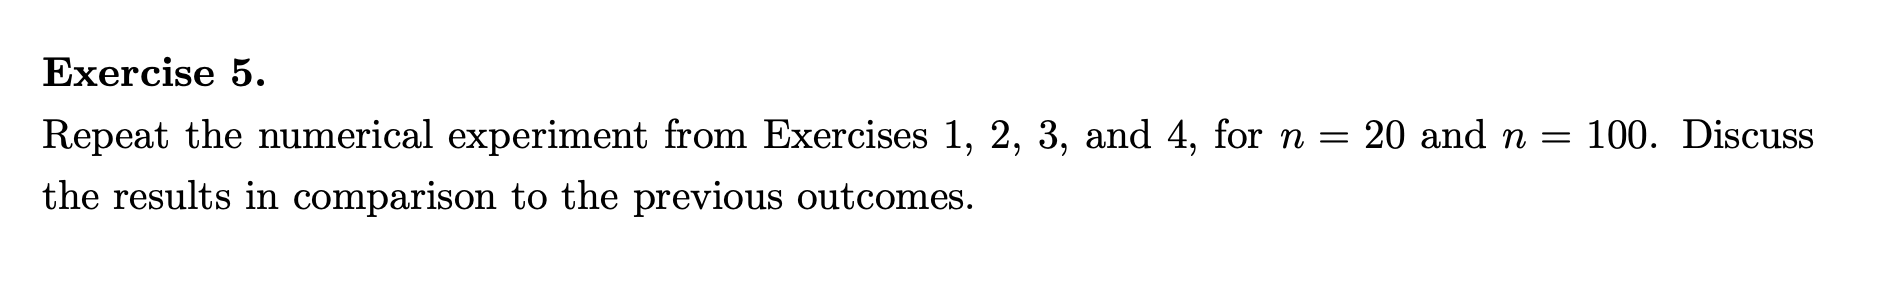